<div style="text-align: center;">
  <h1>TA145 - Redes Neuronales y Aprendizaje Profundo</h1>
  <h2>Trabajo Práctico 2: Perceptrón</h2>
</div>

---
---

<div style="text-align: left;">
  <h3><b>Introducción</b></h3>
</div>

---
---

<div style="text-align: left;">
  <h3><b>Desarrollo</b></h3>
</div>

<div style="text-align: left;">
  <h3><b>Base teórica: Perceptrón simple</b></h3>
</div>

<div style="text-align: left;">
  <h4><b>Fundamentos del perceptrón simple</b></h4>
</div>

El perceptrón simple, introducido por Frank Rosenblatt en 1957, es el modelo más elemental dentro de las redes neuronales artificiales. Consta de una única neurona que recibe un vector de entrada $\mathbf{x} \in \mathbb{R}^n$, lo pondera mediante pesos $\mathbf{w}$ y aplica una función de activación binaria para determinar la clase asignada. Su objetivo es resolver problemas de clasificación **linealmente separables**.

Cada entrada $x_i$ se multiplica por un peso $w_i$, y el modelo incorpora además un sesgo $b$ que desplaza la frontera de decisión. La salida del perceptrón es un valor discreto entre $\{-1, ~ +1\}$ (o entre $\{0, ~ +1\}$, dependiendo la bibliografía), permitiendo distinguir entre dos categorías opuestas.

La Figura 1 muestra un esquema de esta arquitectura, donde las entradas se combinan linealmente y luego son procesadas por una función de activación.

<figure> <img src="https://raw.githubusercontent.com/felipeperassi/Neural-Networks/fc64579a7856f6e17e2e243c9dc3ab1cd7518d0c/Hopfield-Networks/ReportImages/HopfieldNetworks.png" alt="Estructura de una red de Hopfield" width="300"> <figcaption><i>Figura 1.</i> Estructura de una red de Hopfield totalmente conectada.</figcaption> </figure>

\[
z = \mathbf{w}^\top \mathbf{x} + b
\]

\[
\hat{y} = \text{sgn}(z) =
\begin{cases}
+1, & z \ge 0, \\
-1, & z < 0.
\end{cases}
\]

La superficie de decisión está dada por el hiperplano:

\[
\mathbf{w}^\top \mathbf{x} + b = 0.
\]

\subsection*{Regla de aprendizaje}

El entrenamiento se realiza de forma supervisada. Dado un par $(\mathbf{x}, y)$ con $y \in \{-1, +1\}$, el perceptrón actualiza sus parámetros únicamente cuando comete un error. Sea

\[
O = y - \hat{y},
\]

la regla de actualización es:

\[
\mathbf{w} \leftarrow \mathbf{w} + \eta \, O \, \mathbf{x},
\qquad
b \leftarrow b + \eta \, O,
\]

donde $\eta > 0$ es la tasa de aprendizaje.  
Si la predicción es correcta, $O = 0$ y no se realizan cambios.  
Si es incorrecta, los pesos se ajustan en la dirección adecuada para corregir el error, desplazando el hiperplano de decisión.

\subsection*{Capacidad de clasificación y limitaciones}

El perceptrón simple puede clasificar correctamente cualquier conjunto de datos que sea linealmente separable. Cuando esta condición se cumple, el algoritmo converge en un número finito de iteraciones, como establece el teorema de convergencia del perceptrón.

No obstante, presenta limitaciones importantes: no puede resolver problemas no lineales, como el XOR, ya que no existe un hiperplano que separe correctamente ambas clases. Este tipo de problemas motivó la aparición de perceptrones multicapa y funciones de activación no lineales.

\subsection*{Interpretación geométrica}

Desde un punto de vista geométrico, el entrenamiento del perceptrón consiste en encontrar un vector normal al hiperplano que separa las dos clases. Cada corrección de parámetros rota o desplaza dicho hiperplano. El lado donde el modelo predice $\hat{y} = +1$ queda determinado por el signo de $\mathbf{w}^\top \mathbf{x} + b$, mientras que la región opuesta corresponde a $\hat{y} = -1$.


<div style="text-align: left;">
  <h4><b>Ejercicio 1</b></h4>
</div>

**Implemente un perceptrón simple que aprenda la función lógica AND y la función lógica OR, de 2 y de 4 entradas. Muestre la evolución del error durante el entrenamiento. Para el caso de 2 dimensiones, grafique la recta discriminadora y todos los vectores de entrada de la red.**

**AND (2 entradas)**

<table align="center"> <tr> <th style="text-align:center;">X₁</th> <th style="text-align:center;">X₂</th> <th style="text-align:center;">Y</th> </tr> <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr> <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr> <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr> <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr> </table>

**AND (4 entradas)**

<table align="center" style="border:none;"> 
<tr> 
<!-- Primera tabla (8 filas) --> 
<td valign="top" style="border:none;">
<table>
    <tr><th style="text-align:center;">X₁</th><th style="text-align:center;">X₂</th><th style="text-align:center;">X₃</th><th style="text-align:center;">X₄</th><th style="text-align:center;">Y</th></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
</table>

</td>

<!-- Columna vacía -->
<td style="width:40px; border:none;"></td>

<!-- Segunda tabla (8 filas) -->
<td valign="top" style="border:none;">

<table>
    <tr><th style="text-align:center;">X₁</th><th style="text-align:center;">X₂</th><th style="text-align:center;">X₃</th><th style="text-align:center;">X₄</th><th style="text-align:center;">Y</th></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
</table>

</td>
</tr> </table>


**OR (2 entradas)**

<table align="center"> <tr> <th style="text-align:center;">X₁</th> <th style="text-align:center;">X₂</th> <th style="text-align:center;">Y</th> </tr> <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr> <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr> <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr> <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr> </table>

**OR (4 entradas)**

<table align="center" style="border:none;"> 
<tr> 
<!-- Primera tabla (8 filas) --> 
<td valign="top" style="border:none;">
<table>
    <tr><th style="text-align:center;">X₁</th><th style="text-align:center;">X₂</th><th style="text-align:center;">X₃</th><th style="text-align:center;">X₄</th><th style="text-align:center;">Y</th></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
</table>
</td>

<!-- Columna vacía -->
<td style="width:40px; border:none;"></td>

<!-- Segunda tabla (8 filas) -->
<td valign="top" style="border:none;">
<table>
    <tr><th style="text-align:center;">X₁</th><th style="text-align:center;">X₂</th><th style="text-align:center;">X₃</th><th style="text-align:center;">X₄</th><th style="text-align:center;">Y</th></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
</table>
</td>
</tr> 
</table>

&ensp; En primer lugar, se importan las librerías necesarias para el desarrollo del código implementado. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import HTML, display
from typing import Tuple

In [2]:
import itertools

def logic_vectors(gate: str, n_inputs: int):
    """
    Generates input-output pairs for a specified logic gate with n_inputs.
    """
    X = np.array(list(itertools.product([1, -1], repeat=n_inputs)))

    Y = []
    for x in X:
        if gate.upper() == "AND":
            y = 1 if all(xi == 1 for xi in x) else -1
        elif gate.upper() == "OR":
            y = 1 if any(xi == 1 for xi in x) else -1
        elif gate.upper() == "XOR":
            y = 1 if sum(1 for xi in x if xi == 1) % 2 == 1 else -1
        elif gate.upper() == "NAND":
            y = -1 if all(xi == 1 for xi in x) else 1
        elif gate.upper() == "NOR":
            y = -1 if any(xi == 1 for xi in x) else 1
        else:
            raise ValueError(f"Compuerta no reconocida: {gate}")
        Y.append(y)

    # Display the input-output pairs in an HTML table
    df_x = pd.DataFrame(X, columns=[f'X{i+1}' for i in range(n_inputs)])
    df_y = pd.DataFrame(Y, columns=['Y'])
    html_table = pd.concat([df_x, df_y], axis=1).to_html(index=False)
    display(HTML(html_table))

    return X, np.array(Y)

In [4]:
X2, YAnd2 = logic_vectors("AND", 2)
X4, YAnd4 = logic_vectors("AND", 4)


X1,X2,Y
1,1,1
1,-1,-1
-1,1,-1
-1,-1,-1


X1,X2,X3,X4,Y
1,1,1,1,1
1,1,1,-1,-1
1,1,-1,1,-1
1,1,-1,-1,-1
1,-1,1,1,-1
1,-1,1,-1,-1
1,-1,-1,1,-1
1,-1,-1,-1,-1
-1,1,1,1,-1
-1,1,1,-1,-1


In [5]:
X2, YOr2 = logic_vectors("OR", 2)
X4, YOr4 = logic_vectors("OR", 4)

X1,X2,Y
1,1,1
1,-1,1
-1,1,1
-1,-1,-1


X1,X2,X3,X4,Y
1,1,1,1,1
1,1,1,-1,1
1,1,-1,1,1
1,1,-1,-1,1
1,-1,1,1,1
1,-1,1,-1,1
1,-1,-1,1,1
1,-1,-1,-1,1
-1,1,1,1,1
-1,1,1,-1,1


In [ ]:
class Perceptron:
    def __init__(self):
        self.weights = None
        self.error_list = []

    def train(self, input: np.ndarray, target: np.ndarray, learning_rate: float, max_iterations: int = 100) -> None:
        """
        Train the perceptron using the given input and target values.
        """
        input_extended = np.c_[np.ones(input.shape[0]), input]  # Bias term
        self.weights = np.zeros(input_extended.shape[1])

        wrong_class = True
        iteration = 0
        while wrong_class and iteration < max_iterations:
            h = input_extended @ self.weights
            output = np.where(h >= 0, 1, -1)
            
            error = self.__MS_error(output, target)
            self.error_list.append(error)

            if error == 0:
                wrong_class = False
            else:
                self.weights += learning_rate * np.sum((target - output)[:, None] * input_extended, axis=0)
            
            iteration += 1

    def predict(self, input: np.ndarray, sign_function: bool = True) -> np.ndarray:
        """
        Predicts the output for the given input using the trained weights.
        """
        input_extended = np.c_[np.ones(input.shape[0]), input]  # Bias term
        if self.weights is None:
            self.weights = np.random.randn(input_extended.shape[1]) * 0.01  # Small random weights
        
        h = input_extended @ self.weights
        if not sign_function:
            return h
        
        return np.where(h >= 0, 1, -1)
    
    def capacity(self, n_patterns: int, n_features: int, n_problems: int) -> float:
        """
        Calculates the capacity of the perceptron for a given number of patterns.
        """
        n_linear_sep = 0
        iteration = 0
        while iteration < n_problems:
            input = np.random.rand(n_patterns, n_features) * 2 - 1  # Random inputs in [-1, 1]
            target = np.random.choice([-1, 1], size=n_patterns)  # Random targets

            self.train(input, target, learning_rate=0.1)
            if self.error_list[-1] == 0:
                n_linear_sep += 1
            
            iteration += 1
        
        return n_linear_sep / n_problems    
    
    # Auxiliary method

    def __MS_error(self, output: np.ndarray, target: np.ndarray) -> float:
        """
        Calculate the Mean Squared Error between output and target.
        """
        return np.mean((output - target) ** 2)

In [7]:
def plot_errors(errors, learning_rates, title, iteration):
    if iteration == 1:
        plt.figure(figsize=(10, 6))
    
    plt.plot(errors, marker='o')
    plt.title(title)
    plt.xlabel("iterations")
    plt.ylabel("Mean Squared Error")
    plt.legend([f"LR: {lr:.2f}" for lr in learning_rates])
    
    if iteration == len(learning_rates):
        plt.grid()
        plt.show()

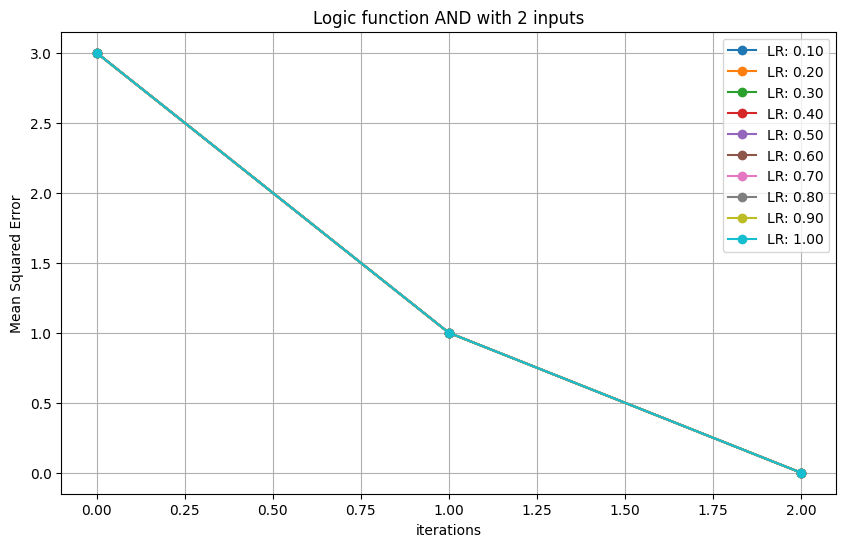

In [8]:
learning_rates = np.arange(0.1, 1.1, 0.1)

for i, nu in enumerate(learning_rates):
    per = Perceptron()
    per.train(X2, YAnd2, nu)
    plot_errors(per.error_list, learning_rates, f"Logic function AND with 2 inputs", i+1)

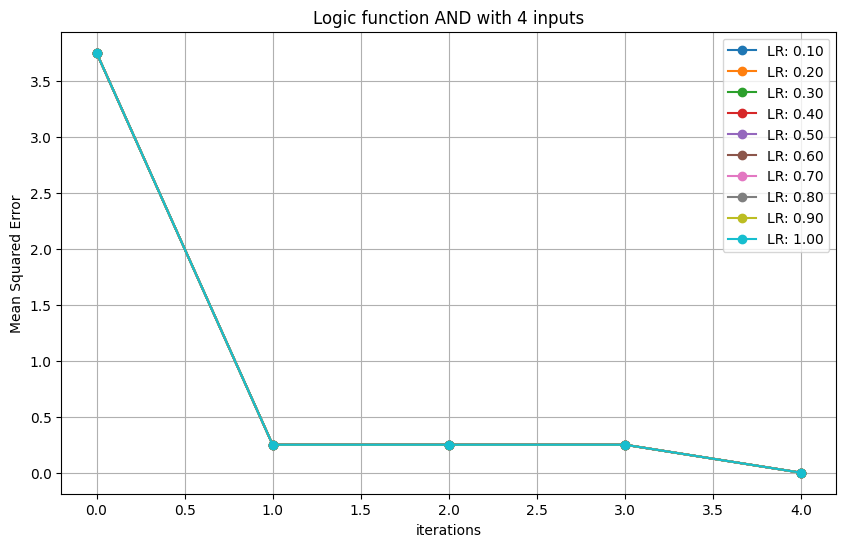

In [9]:
for i, nu in enumerate(learning_rates):
    per = Perceptron()
    per.train(X4, YAnd4, nu)
    plot_errors(per.error_list, learning_rates, f"Logic function AND with 4 inputs", i+1)

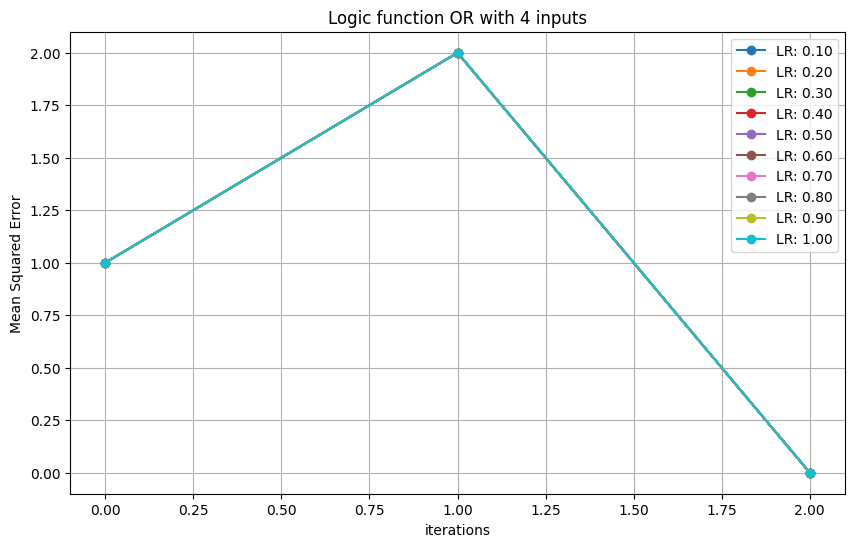

In [10]:
for i, nu in enumerate(learning_rates):
    per = Perceptron()
    per.train(X2, YOr2, nu)
    plot_errors(per.error_list, learning_rates, f"Logic function OR with 4 inputs", i+1)

In [11]:
def plot_perceptron(input, target, title):
    per = Perceptron()
    per.train(input, target, learning_rate=0.1)

    plt.figure(figsize=(8, 6))

    # Data points
    plt.scatter(input[:, 0], input[:, 1], c=target, edgecolors='k', label='Data Points')

    # Decision boundary
    x = np.linspace(-2, 2, 1000)
    y = np.linspace(-2, 2, 1000)
    XX, YY = np.meshgrid(x, y)
    grid = np.column_stack((XX.ravel(), YY.ravel()))
    Z = per.predict(grid).reshape(XX.shape)
    plt.contourf(XX, YY, Z, levels = [-1, 0, 1], alpha = 0.4, linestyles = 'solid')

    # Decision boundary line
    plt.plot(x, (-per.weights[1] * x - per.weights[0]) / per.weights[1], color = 'black', label = 'Decision Boundary')

    plt.title(title)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.legend()
    plt.show()

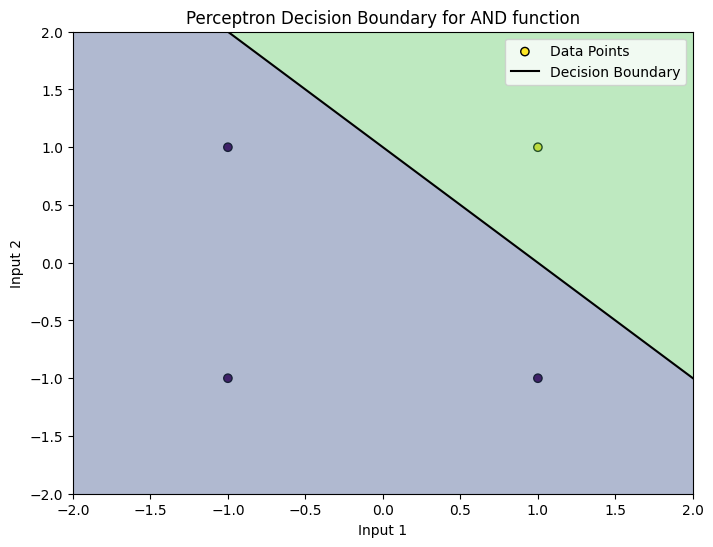

In [12]:
plot_perceptron(X2, YAnd2, "Perceptron Decision Boundary for AND function")

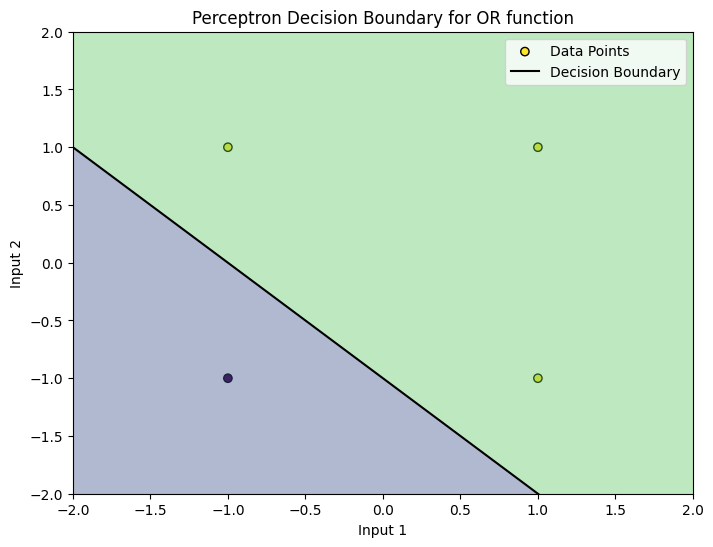

In [13]:
plot_perceptron(X2, YOr2, "Perceptron Decision Boundary for OR function")

<div style="text-align: left;">
  <h4><b>Ejercicio 2</b></h4>
</div>

**Determine numéricamente cómo varía la capacidad del perceptrón simple en función del número de patrones enseñados.**

In [32]:
def plot_capacities(patterns_range, features_range, n_problems):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

    plt.figure(figsize=(10, 6))
    for idx, n_features in enumerate(features_range):
        capacities = []
        for n_patterns in patterns_range:
            per = Perceptron()
            capacity = per.capacity(n_patterns, n_features, n_problems)
            capacities.append(capacity)

        plt.plot(patterns_range, capacities, color=colors[idx], label=f"N features = {n_features}")
        plt.axvline(x=2*n_features, linestyle='--', color=colors[idx], alpha=0.7, label=f'$2 N_\\text{{features}} = {2*n_features}$')
        plt.title(f"Perceptron Capacity")
        plt.xlabel("Number of Patterns")
        plt.ylabel("Capacity (Fraction of Linearly Separable Problems)")
        plt.grid()
        plt.legend()

    plt.show()

KeyboardInterrupt: 

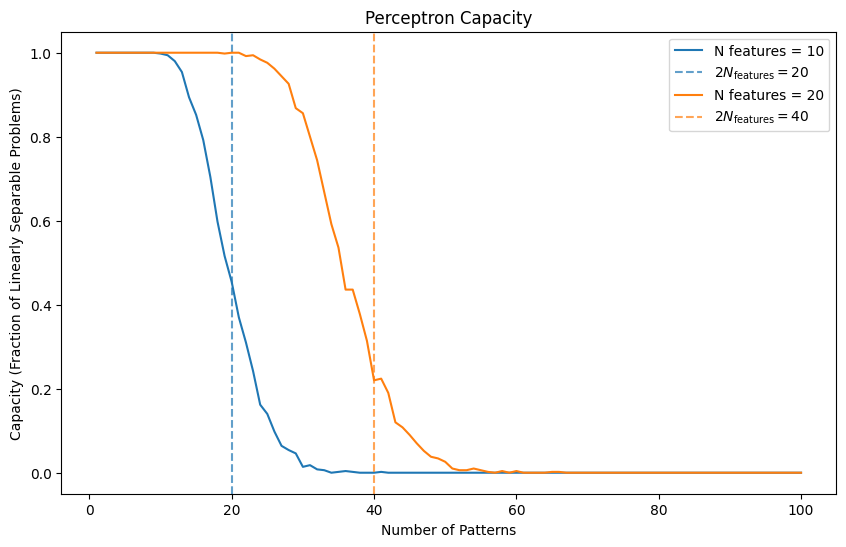

In [33]:
patterns_range = range(1, 101)
features_range = [10, 20, 30]
plot_capacities(patterns_range, features_range, n_problems=500)

<div style="text-align: left;">
  <h4><b>Ejercicio 3</b></h4>
</div>

**Implemente un perceptrón multicapa que aprenda la función lógica XOR de $2$ y de $4$ entradas (utilizando el algoritmo *Backpropagation* y actualizando en *batch*). Muestre cómo evoluciona el error durante el entrenamiento.**

**XOR (2 entradas)**

<table align="center"> 
  <tr> 
    <th style="text-align:center;">X₁</th> 
    <th style="text-align:center;">X₂</th> 
    <th style="text-align:center;">Y</th> 
  </tr> 
  <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr> 
  <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr> 
  <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr> 
  <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr> 
</table>


**XOR (4 entradas)**

<table align="center" style="border:none;"> 
<tr> 
<!-- Primera tabla (8 filas) --> 
<td valign="top" style="border:none;">
<table>
    <tr><th style="text-align:center;">X₁</th><th style="text-align:center;">X₂</th><th style="text-align:center;">X₃</th><th style="text-align:center;">X₄</th><th style="text-align:center;">Y</th></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
</table>
</td>

<!-- Columna vacía -->
<td style="width:40px; border:none;"></td>

<!-- Segunda tabla (8 filas) -->
<td valign="top" style="border:none;">
<table>
    <tr><th style="text-align:center;">X₁</th><th style="text-align:center;">X₂</th><th style="text-align:center;">X₃</th><th style="text-align:center;">X₄</th><th style="text-align:center;">Y</th></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
</table>
</td>
</tr> 
</table>

In [16]:
X2, YXor2 = logic_vectors("XOR", 2)
X4, YXor4 = logic_vectors("XOR", 4)

X1,X2,Y
1,1,-1
1,-1,1
-1,1,1
-1,-1,-1


X1,X2,X3,X4,Y
1,1,1,1,-1
1,1,1,-1,1
1,1,-1,1,1
1,1,-1,-1,-1
1,-1,1,1,1
1,-1,1,-1,-1
1,-1,-1,1,-1
1,-1,-1,-1,1
-1,1,1,1,1
-1,1,1,-1,-1


In [17]:
class MultiLayerPerceptron:
    def __init__(self, layers_config, act_hidden, der_act_hidden, act_output, der_act_output):

        if layers_config is None or layers_config[-1] != 1:
            raise ValueError("A valid layers configuration must be provided.")
        if act_output is None or der_act_output is None:
            raise ValueError("Output activation function and its derivative must be provided.")
        if act_hidden is None or der_act_hidden is None:
            raise ValueError("Hidden activation function and its derivative must be provided.")
        
        self.layers = layers_config

        self.act_hidden = act_hidden
        self.der_act_hidden = der_act_hidden
        self.act_hidden_name = act_hidden.__name__.lower()

        self.act_output = act_output
        self.der_act_output = der_act_output
        self.act_output_name = act_output.__name__.lower()

        self.weights, self.biases = self.__initialize_weights()
        self.errors = None
        self.val_errors = None

    def forward_pass(self, input) -> Tuple[np.ndarray, np.ndarray, list, list]:
        """ 
        Perform a forward pass through the network.
        """
        preacts, acts = [], [input]

        for W, b in zip(self.weights[:-1], self.biases[:-1]):
            preact = input @ W + b
            input = self.act_hidden(preact)
            preacts.append(preact)
            acts.append(input)

        output_preact = input @ self.weights[-1] + self.biases[-1]
        output = self.act_output(output_preact)
        preacts.append(output_preact)
        acts.append(output)

        return output, output_preact, preacts, acts

    def backpropagation(self, input, target, learning_rate, batch_size=None, val_input=None, val_target=None, tol=0.005, max_epochs=10000) -> Tuple[int, float]:
        """
        Train the MLP using backpropagation.
        """
        target = target.reshape(-1, 1)  # Ensure target is a column vector
        if self.act_output_name == 'sigmoid':
            target = (target + 1) / 2

        N = input.shape[0]
        if batch_size is None or batch_size > N: # Added batch size check
            batch_size = N

        output, output_preact, preacts, acts = self.forward_pass(input)
        error = np.mean((output - target) ** 2)
        
        self.errors = []
        self.val_errors = []
        epochs = 0
        
        while error >= tol and epochs < max_epochs:
            input, target = self.__shuffle_data(input, target, batch_size)

            for start in range(0, N, batch_size):
                end = start + batch_size
                input_batch, target_batch = input[start:end], target[start:end]

                output, output_preact, preacts, acts = self.forward_pass(input_batch)
                
                deltas = [None] * len(self.weights)
                deltas[-1] = (output - target_batch) * self.der_act_output(output_preact)

                for idx_layer in reversed(range(len(self.weights) - 1)):
                    deltas[idx_layer] = self.der_act_hidden(preacts[idx_layer]) * (deltas[idx_layer + 1] @ self.weights[idx_layer + 1].T)
            
                for idx_layer in range(len(self.weights)):
                    grad_weights = (acts[idx_layer].T @ deltas[idx_layer]) / input_batch.shape[0]
                    grad_bias = np.mean(deltas[idx_layer], axis=0, keepdims=True)

                    self.weights[idx_layer] -= learning_rate * grad_weights
                    self.biases[idx_layer] -= learning_rate * grad_bias

            if val_input is not None and val_target is not None:
                val_target = val_target.reshape(-1, 1)
                val_output, _, _, _ = self.forward_pass(val_input)
                val_error = self.__MS_error(val_output, val_target)
                self.val_errors.append(val_error)

            output, output_preact, preacts, acts = self.forward_pass(input)
            error = self.__MS_error(output, target)
            self.errors.append(error)
            epochs += 1
        
        return epochs, error
    
    def predict(self, input) -> np.ndarray:
        """
        Predicts the output for the given input using the trained weights.
        """
        output, _, _, _ = self.forward_pass(input)
        
        if self.act_output_name == 'tanh':
            return np.where(output >= 0, 1, -1)
        elif self.act_output_name == 'linear':
            return output
        else:
            return np.where(output >= 0.5, 1, -1)
    
    # --- Auxiliary methods ---

    def __initialize_weights(self) -> Tuple[list, list]:
        """
        Initialize weights and biases for each layer.
        """
        acts_supported = ['sigmoid', 'tanh', 'relu', 'linear']
        if not any(name in self.act_hidden_name for name in acts_supported):
            raise ValueError(f"act function '{self.act_hidden_name}' is not supported.")
        if not any(name in self.act_output_name for name in acts_supported):
            raise ValueError(f"output act function '{self.act_output_name}' is not supported.")

        W, b = [], []
        for n_in, n_out in zip(self.layers[:-1], self.layers[1:]):
            # if act_name == acts_supported[2]: # ReLU
            #     W_aux = np.random.normal(0, np.sqrt(2. / n_in), (n_in, n_out))
            #     W.append(W_aux)
        
            lim = np.sqrt(6. / (n_in + n_out))
            W_aux = np.random.uniform(-lim, lim, (n_in, n_out))
            W.append(W_aux)
            b.append(np.zeros((1, n_out)))
            
        return W, b

    def __shuffle_data(self, input, target, batch_size) -> Tuple[np.ndarray, np.ndarray]:
        """
        Shuffle input and target data.
        """
        if batch_size < input.shape[0]:
            idx_perm = np.random.permutation(input.shape[0])
            input = input[idx_perm]
            target = target[idx_perm]

        return input, target
    
    def __MS_error(self, output, target) -> float:
        """
        Calculate the Mean Squared Error between output and target.
        """
        return np.mean((output - target) ** 2)

In [18]:
def sigmoid(x): return 1 / (1 + np.exp(-x))
def der_sigmoid(x): return sigmoid(x) * (1 - sigmoid(x))
def der_tanh(x): return 1 - np.tanh(x) ** 2
def linear(x): return x
def der_linear(x): return np.ones_like(x)

In [19]:
def plot_errors_mlp(mlp, input, target, learning_rate, max_epochs, title, val_input=None, val_target=None, batch_size=None):
    epochs, last_error = mlp.backpropagation(input, target, learning_rate, val_input=val_input, val_target=val_target, max_epochs=max_epochs, batch_size=batch_size)
    
    plt.figure(figsize=(10, 6))
    plt.plot(mlp.errors, label='Training Error')
    if val_input is not None and val_target is not None:
        plt.plot(mlp.val_errors, label='Validation Error')
    
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.grid()
    plt.legend()
    plt.show()

    display(HTML(f"<b>Final MSE for training after {epochs} epochs: {last_error:.4f}</b>"))
    if val_input is not None and val_target is not None:
        display(HTML(f"<b>Final MSE for validation after {epochs} epochs: {mlp.val_errors[-1]:.4f}</b>"))

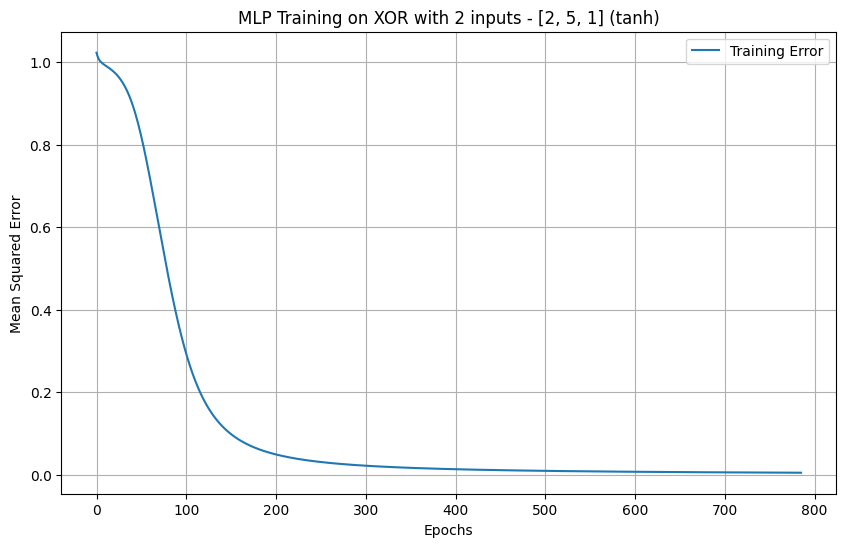

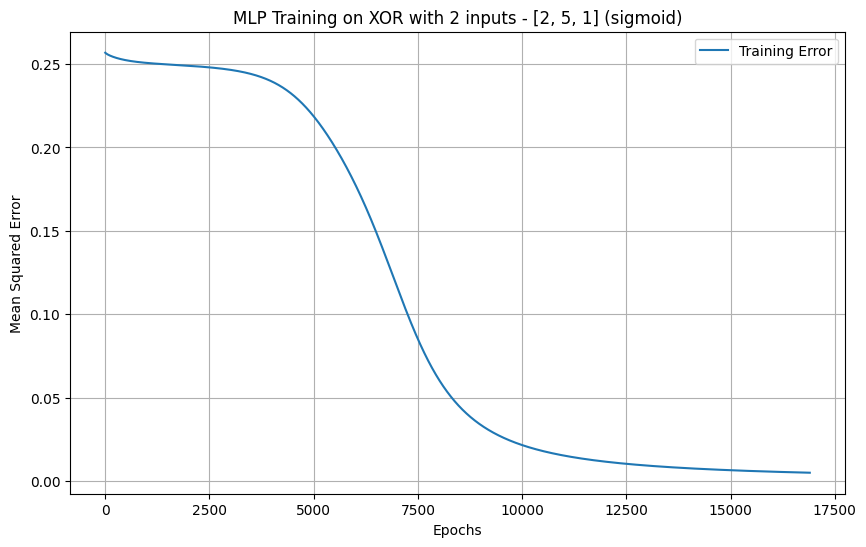

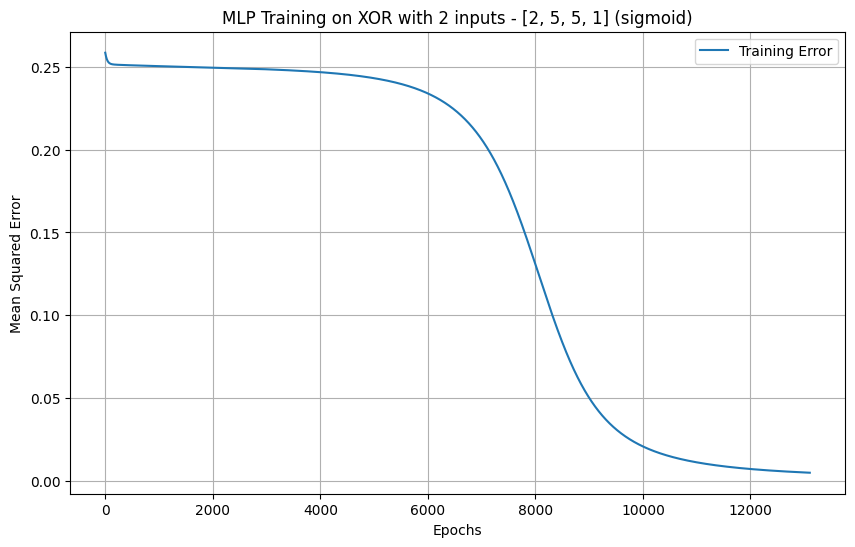

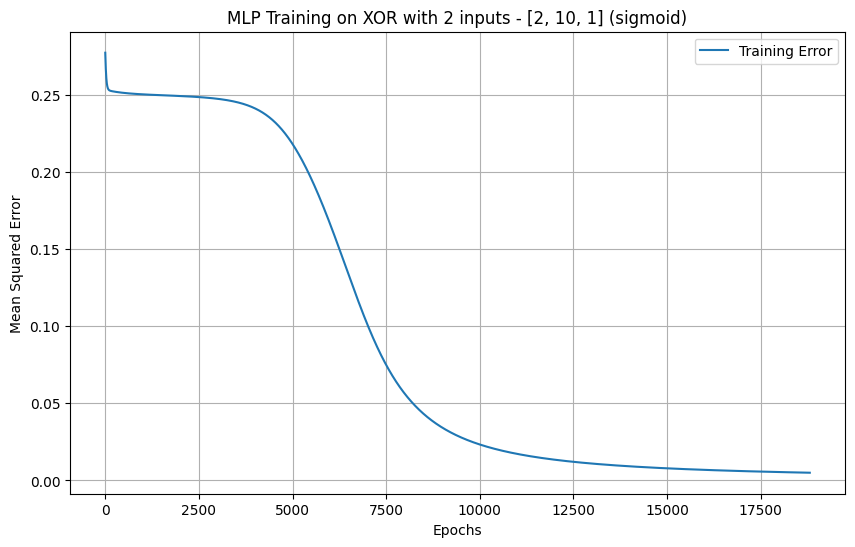

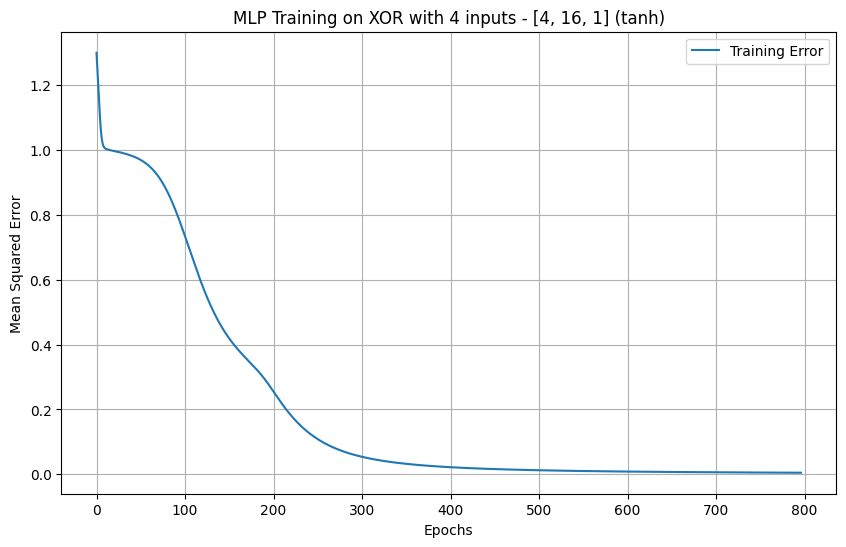

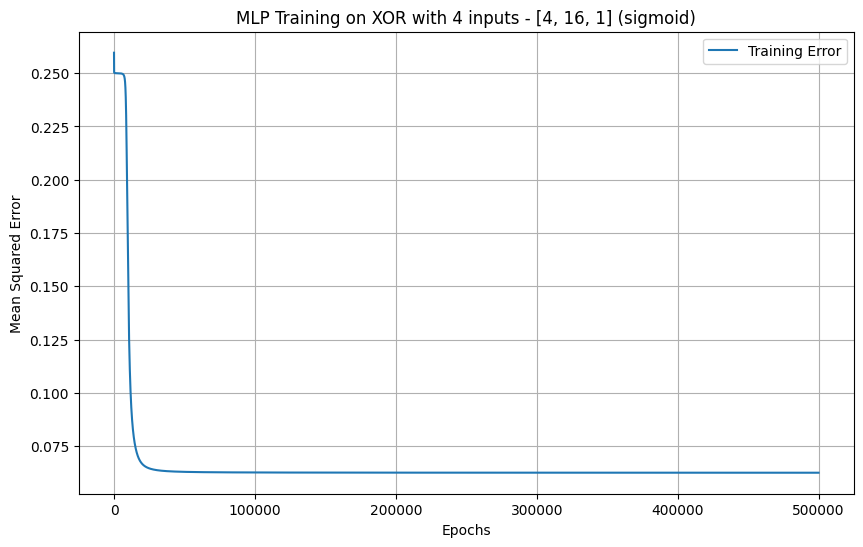

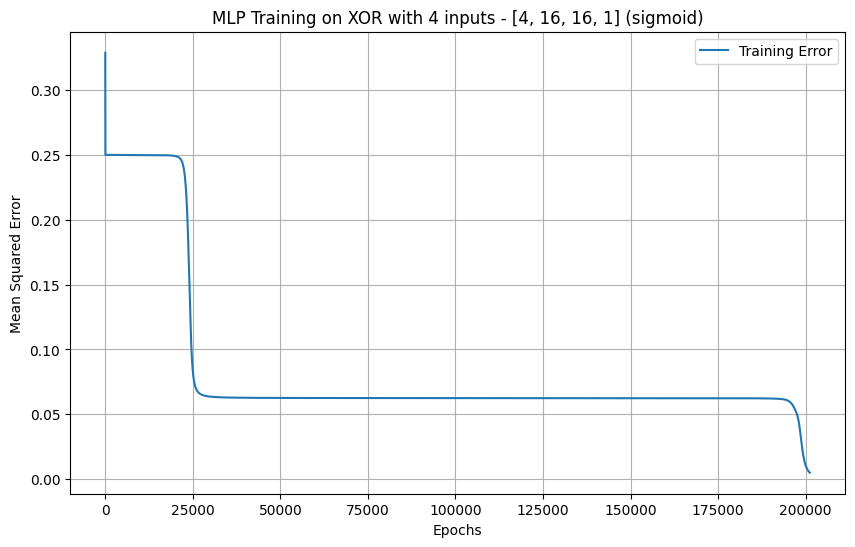

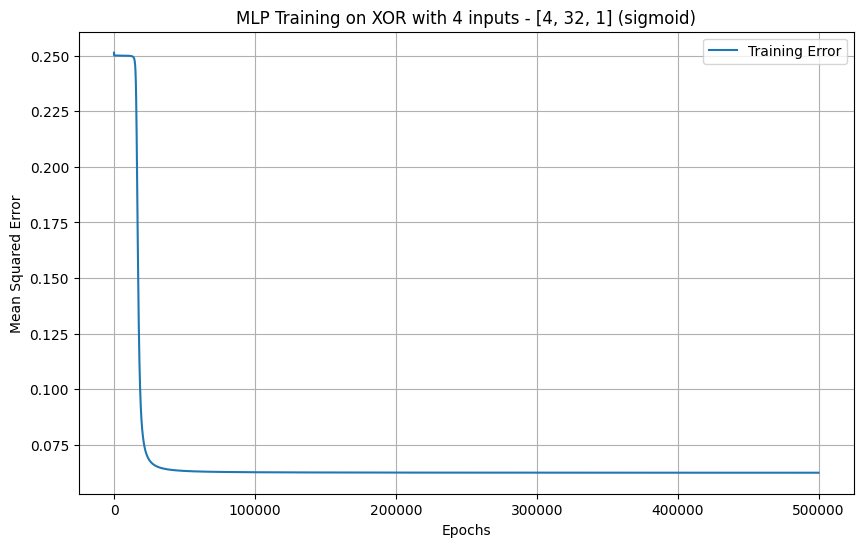

In [20]:
# MLP tanh for XOR with 2 inputs
MLP2_tanh = MultiLayerPerceptron(layers_config=[2, 5, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=np.tanh, der_act_output=der_tanh)
plot_errors_mlp(MLP2_tanh, X2, YXor2, learning_rate=0.1, max_epochs=10000, title="MLP Training on XOR with 2 inputs - [2, 5, 1] (tanh)")

# MLP sigmoid for XOR with 2 inputs
MLP2_sigmoid = MultiLayerPerceptron(layers_config=[2, 5, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP2_sigmoid, X2, YXor2, learning_rate=0.1, max_epochs=100000, title="MLP Training on XOR with 2 inputs - [2, 5, 1] (sigmoid)")

MLP2_sigmoid = MultiLayerPerceptron(layers_config=[2, 5, 5, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP2_sigmoid, X2, YXor2, learning_rate=0.1, max_epochs=100000, title="MLP Training on XOR with 2 inputs - [2, 5, 5, 1] (sigmoid)")

MLP2_sigmoid = MultiLayerPerceptron(layers_config=[2, 10, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP2_sigmoid, X2, YXor2, learning_rate=0.1, max_epochs=100000, title="MLP Training on XOR with 2 inputs - [2, 10, 1] (sigmoid)")

# MLP tanh for XOR with 4 inputs
MLP4_tanh = MultiLayerPerceptron(layers_config=[4, 16, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=np.tanh, der_act_output=der_tanh)
plot_errors_mlp(MLP4_tanh, X4, YXor4, learning_rate=0.2, max_epochs=100000, title="MLP Training on XOR with 4 inputs - [4, 16, 1] (tanh)")

# MLP sigmoid for XOR with 4 inputs
MLP4_sigmoid = MultiLayerPerceptron(layers_config=[4, 16, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP4_sigmoid, X4, YXor4, learning_rate=0.3, max_epochs=500000, title="MLP Training on XOR with 4 inputs - [4, 16, 1] (sigmoid)")

MLP4_sigmoid = MultiLayerPerceptron(layers_config=[4, 16, 16, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP4_sigmoid, X4, YXor4, learning_rate=0.3, max_epochs=500000, title="MLP Training on XOR with 4 inputs - [4, 16, 16, 1] (sigmoid)")

MLP4_sigmoid = MultiLayerPerceptron(layers_config=[4, 32, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP4_sigmoid, X4, YXor4, learning_rate=0.3, max_epochs=500000, title="MLP Training on XOR with 4 inputs - [4, 32, 1] (sigmoid)")


<div style="text-align: left;">
  <h4><b>Ejercicio 4</b></h4>
</div>

**(A). Implemente una red con aprendizaje *Backpropagation* que aprenda la siguiente función:**

$$ f(x, ~ y, ~ z) = \sin (x) + \cos(y) + z$$

**donde: $x, ~ y \in [0, ~ 2\pi]$ y $z\in [-1, ~1]$. Para ello construya un conjunto de datos de entrenamiento y un conjunto de evaluación. Muestre la evolución del error de entrenamiento y de evaluación en función de las épocas de entrenamiento.** 

In [21]:
def generate_dataset(n_samples, train_size=0.8):
    """
    Generate a dataset for the function f(x, y, z) = sin(x) + cos(y) + z
    where x, y in [0, 2pi] and z in [-1, 1].  
    """
    if n_samples <= 0:
        raise ValueError("n_samples must be a positive integer.")
    
    x = np.random.uniform(0, 2 * np.pi, n_samples)
    y = np.random.uniform(0, 2 * np.pi, n_samples)
    z = np.random.uniform(-1, 1, n_samples)
    f = np.sin(x) + np.cos(y) + z
    
    X = np.column_stack((x, y, z))
    Y = f.reshape(-1, 1)

    train_samples = int(n_samples * train_size)
    X_train, X_test = X[:train_samples], X[train_samples:]
    Y_train, Y_test = Y[:train_samples], Y[train_samples:]
    
    return X_train, Y_train, X_test, Y_test

In [22]:
n_samples = 1000
X_train, Y_train, X_test, Y_test = generate_dataset(n_samples, train_size=0.8)
display(HTML(f"<b>Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}</b>"))

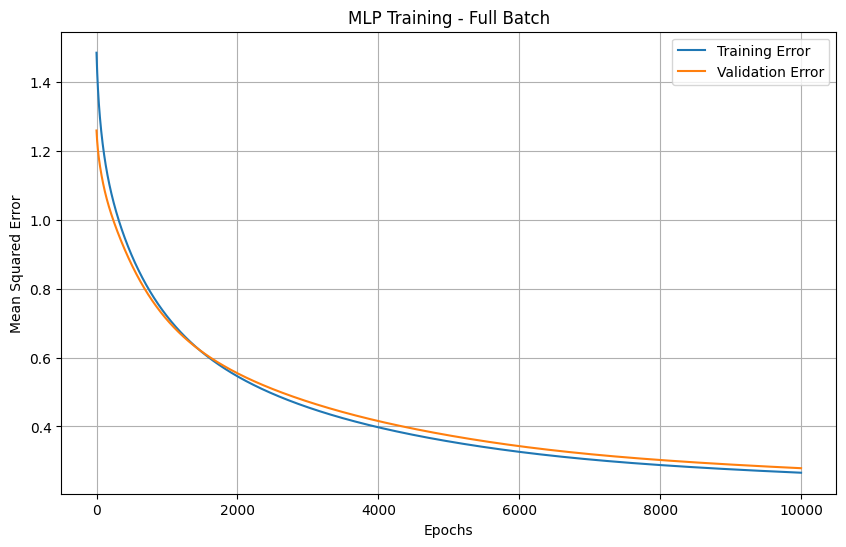

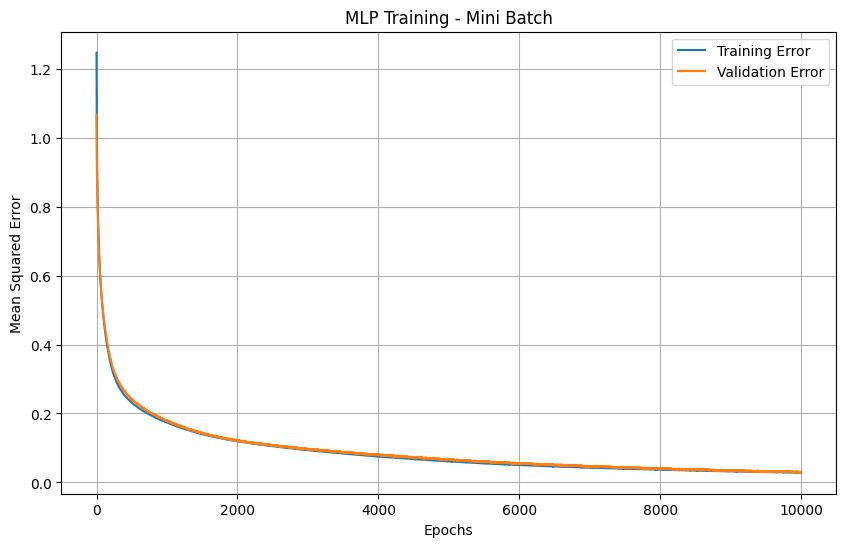

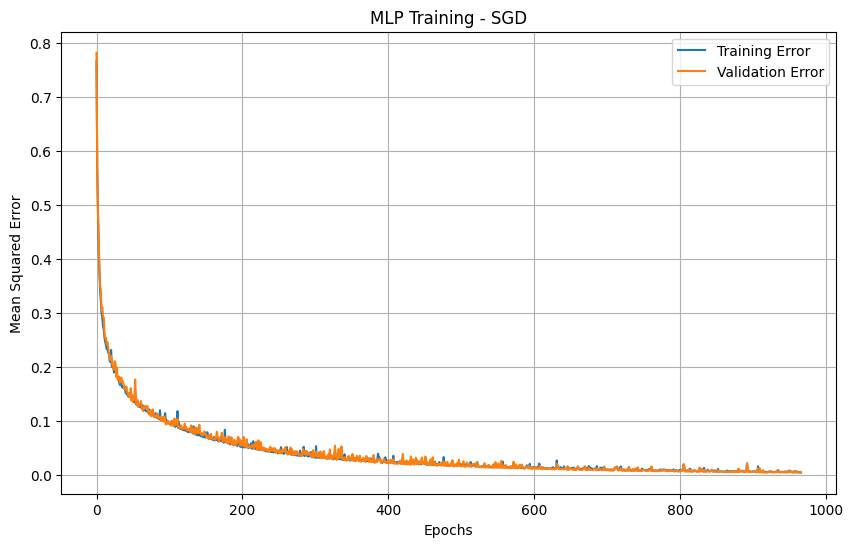

In [23]:
# Full-Batch Training
MLP = MultiLayerPerceptron(layers_config=[3, 50, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=linear, der_act_output=der_linear)
plot_errors_mlp(MLP, X_train, Y_train, learning_rate=0.001, max_epochs=10000, title="MLP Training - Full Batch", val_input=X_test, val_target=Y_test)

# Mini-Batch Training
MLP = MultiLayerPerceptron(layers_config=[3, 50, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=linear, der_act_output=der_linear)
plot_errors_mlp(MLP, X_train, Y_train, learning_rate=0.001, max_epochs=10000, title="MLP Training - Mini Batch", val_input=X_test, val_target=Y_test, batch_size=32)

# Stochastic Gradient Descent (SGD) Training
MLP = MultiLayerPerceptron(layers_config=[3, 50, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=linear, der_act_output=der_linear)
plot_errors_mlp(MLP, X_train, Y_train, learning_rate=0.001, max_epochs=10000, title="MLP Training - SGD", val_input=X_test, val_target=Y_test, batch_size=1)


**(B). Estudie la evolución de los errores durante el entrenamiento de una red con una capa oculta de $30$ neuronas cuando el conjunto de entrenamiento contiene $40$ muestras. ¿Qué ocurre si el minibatch tiene tamaño $40$? ¿Y si tiene tamaño $1$?**

In [24]:
n_samples = 100
X_train, Y_train, X_test, Y_test = generate_dataset(n_samples, train_size=0.4)
display(HTML(f"<b>Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}</b>"))

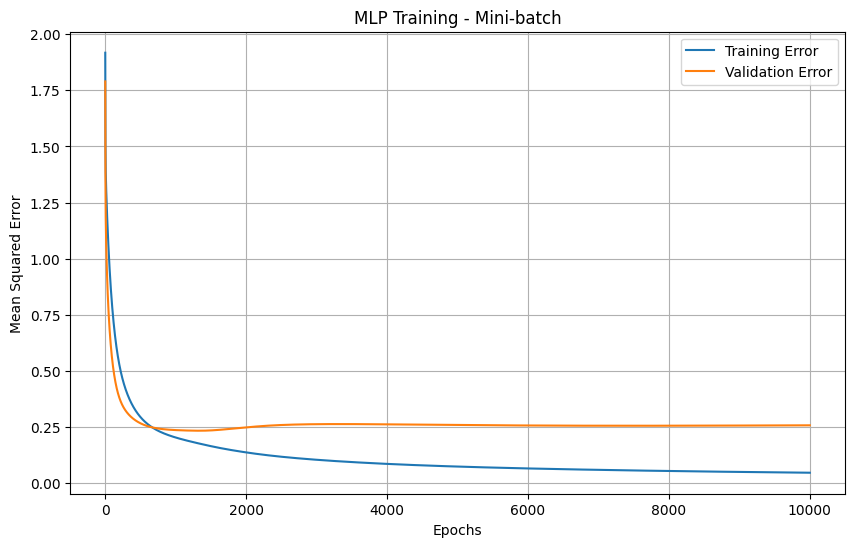

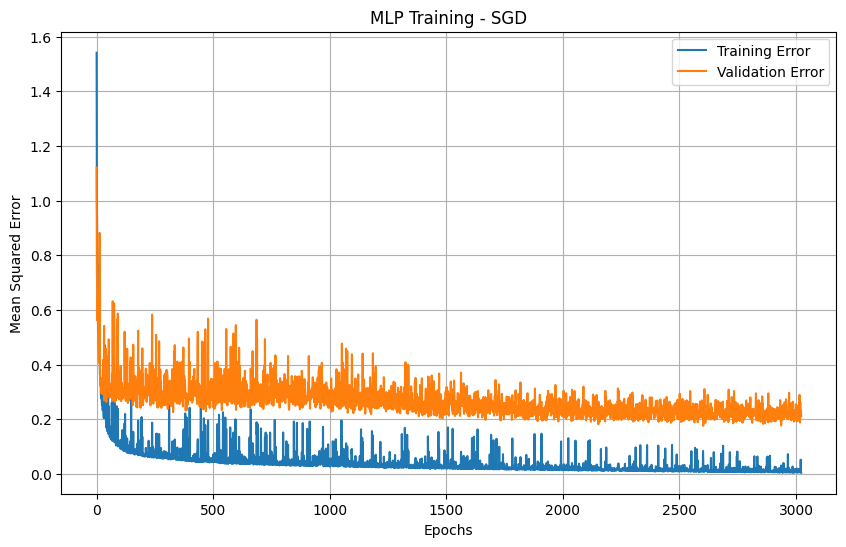

In [25]:
# Mini-batch Training
MLP = MultiLayerPerceptron(layers_config=[3, 30, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=linear, der_act_output=der_linear)
plot_errors_mlp(MLP, X_train, Y_train, learning_rate=0.01, max_epochs=10000, title="MLP Training - Mini-batch", val_input=X_test, val_target=Y_test, batch_size=40)

# Stochastic Gradient Descent (SGD) Training
MLP = MultiLayerPerceptron(layers_config=[3, 30, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=linear, der_act_output=der_linear)
plot_errors_mlp(MLP, X_train, Y_train, learning_rate=0.01, max_epochs=10000, title="MLP Training - SGD", val_input=X_test, val_target=Y_test, batch_size=1)

<div style="text-align: left;">
  <h4><b>Ejercicio 5</b></h4>
</div>

**Siguiendo el trabajo de Hinton y Salakhutdinov ($2006$), entrene una máquina restringida de Boltzmann con imágenes de la base de datos MNIST. Muestre el error de recontruccion durante el entrenamiento, y ejemplos de cada uno de los dígitos reconstruidos.**

In [26]:
class RestrictedBoltzmannMachine:
    
    def __init__(self) -> None:
        self.n_hidden = None
        self.n_visible = None
        self.weights = None
        self.visible_bias = None
        self.hidden_bias = None
        self.errors = None

    def train(self, input, n_hidden, learning_rate, batch_size, max_epochs=1000) -> Tuple[int, float]:
        """
        Train the RBM using Contrastive Divergence.
        """
        N, self.n_visible = input.shape
        self.n_hidden = n_hidden
        self.__initialize_weights()

        self.errors = []
        epoch = 0
        while epoch < max_epochs:
            input_batch = self.__shuffle_data(input, batch_size)

            epoch_error = 0
            real_size = 0
            for start in range(0, N, batch_size):
                end = start + batch_size
                input_state = input_batch[start:end]
                batch_size = input_state.shape[0]

                hidden_prob, hidden_state = self.__transform(input_state)
                recon_prob, recon_state = self.__inverse_transform(hidden_state)
                hidden_prob_recon, _ = self.__transform(recon_state)

                self.weights += learning_rate * ((input_state.T @ hidden_prob - recon_state.T @ hidden_prob_recon) / batch_size)
                self.visible_bias += learning_rate * np.mean(input_state - recon_state, axis=0)
                self.hidden_bias += learning_rate * np.mean(hidden_prob - hidden_prob_recon, axis=0)

                batch_error = self.__MS_error(recon_prob, input_state)
                epoch_error += batch_error * batch_size # Scale by batch size (it can be smaller at the end)
                real_size += batch_size

            epoch += 1
            self.errors.append(epoch_error / real_size)
        
        return epoch, epoch_error / real_size

    def reconstruct(self, input) -> np.ndarray:
        """
        Reconstruct the input data through the RBM.
        """
        _, hidden_state = self.__transform(input)
        recon_prob, _ = self.__inverse_transform(hidden_state)

        return recon_prob
    
    # --- Auxiliary methods ---

    def __initialize_weights(self) -> None:
        """
        Initialize weights and biases.
        """
        self.weights = np.random.normal(0, 0.01, (self.n_visible, self.n_hidden))
        self.visible_bias = np.zeros(self.n_visible)
        self.hidden_bias = np.zeros(self.n_hidden)

    def __sigmoid(self, x) -> np.ndarray:
        """
        Sigmoid activation function.
        """
        return 1.0 / (1 + np.exp(-x))
    
    def __shuffle_data(self, input, batch_size) -> np.ndarray:
        """
        Shuffle input data.
        """
        if batch_size < input.shape[0]:
            idx_perm = np.random.permutation(input.shape[0])
            input = input[idx_perm]

        return input

    def __transform(self, input) -> np.ndarray:
        """
        Transform input data to hidden representation.
        """
        hidden_prob = self.__sigmoid(input @ self.weights + self.hidden_bias)
        hidden_state = (hidden_prob >= np.random.rand(*hidden_prob.shape)).astype(float)
        return hidden_prob, hidden_state

    def __inverse_transform(self, hidden) -> np.ndarray:
        """
        Transform hidden representation back to visible data.
        """
        visible_prob = self.__sigmoid(hidden @ self.weights.T + self.visible_bias)
        visible_state = (visible_prob >= np.random.rand(*visible_prob.shape)).astype(float)
        return visible_prob, visible_state
    
    def __MS_error(self, output, target) -> float:
        """
        Calculate the Mean Squared Error between output and target.
        """
        return np.mean((output - target) ** 2)

In [3]:
def plot_images(images, labels) -> None:
    """
    Plots a list of images in a single row.
    """
    if (len(images) == 0):
        raise ValueError("No images to display.")

    elif (len(images) == 1):
        plt.figure(figsize=(3.5, 5))
        plt.imshow(images[0], cmap='gray')
        plt.axis('off')

    else:
        size = (10, 5) if len(images) <= 5 else (20, 10)
        fig, axes = plt.subplots(1, len(images), figsize=size)
        for i, ax in enumerate(axes):
            ax.set_title(f"Label: {labels[i]}", fontsize=10, pad=10)
            ax.imshow(images[i], cmap='gray')
            ax.axis('off')
    plt.tight_layout()
    plt.show()

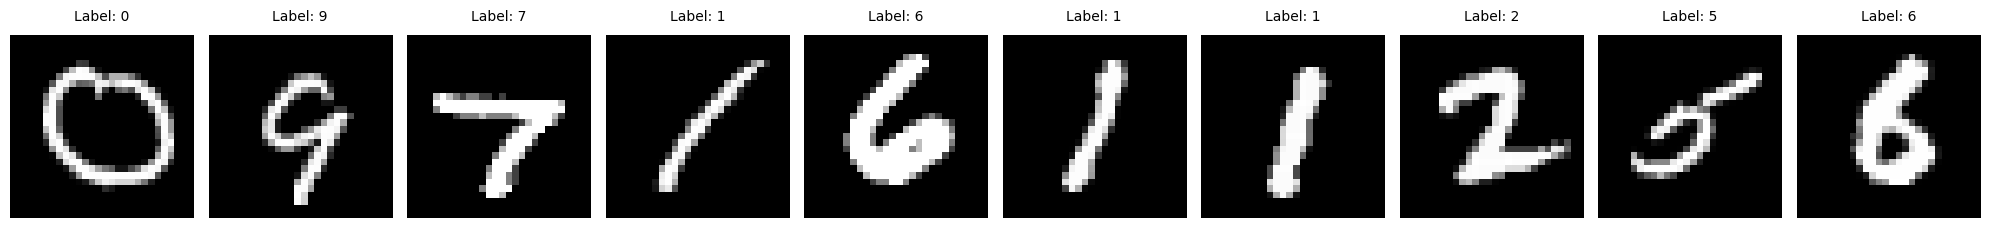

In [6]:
from tensorflow.keras.datasets import mnist # type: ignore

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 10 random images from the training set to verify the data loading
indices = np.random.choice(X_train.shape[0], size=10, replace=False)
plot_images(X_train[indices], Y_train[indices])

In [29]:
def plot_errors_rbm(train_set, test_set, n_hidden, learning_rate, batch_size, max_epochs, title)-> np.ndarray:

    display(HTML(f"<b>---- Training with {n_hidden} hidden units & lr = {learning_rate} ----</b>"))

    RBM = RestrictedBoltzmannMachine()
    epochs, last_error = RBM.train(train_set, n_hidden, learning_rate, batch_size, max_epochs)
    reconstructions = RBM.reconstruct(test_set)

    plt.figure(figsize=(10, 6))
    plt.plot(RBM.errors, marker='x', label='Training Error')
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.grid()
    plt.legend()
    plt.show()

    display(HTML(f"<b>Final MSE for training after {epochs} epochs: {last_error:.4f}</b>"))

    return reconstructions.reshape(-1, 28, 28)
    

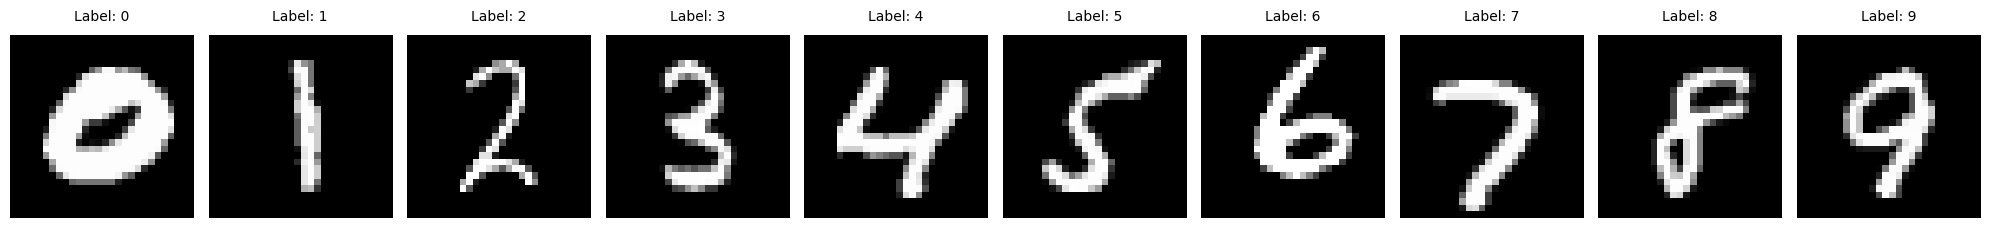

In [30]:
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

X_test_sample = []
aux_plot = []
Y_test_sample = []
for i in range(10):
    idx = np.where(Y_test == i)[0][np.random.choice(len(np.where(Y_test == i)[0]))] # Get random index for each digit
    X_test_sample.append(X_test[idx])
    Y_test_sample.append(Y_test[idx])
    aux_plot.append(X_test[idx].reshape(28, 28))

plot_images(aux_plot, Y_test_sample)

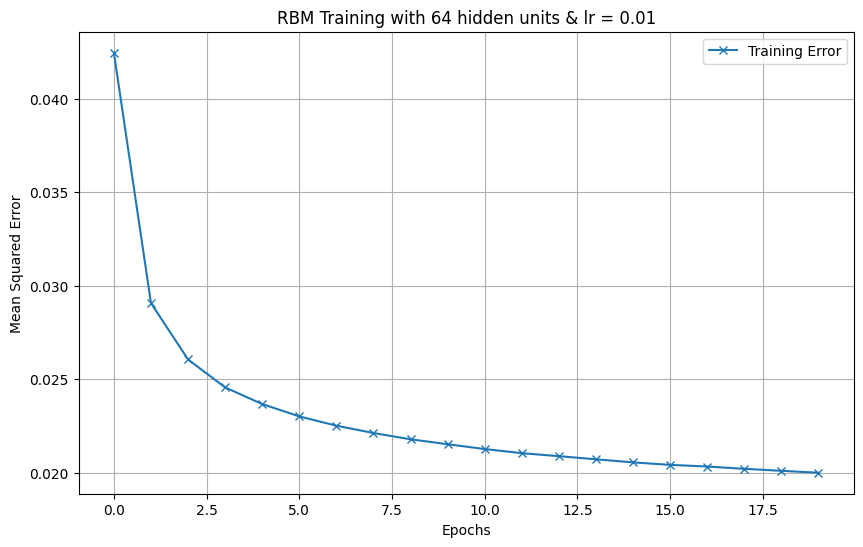

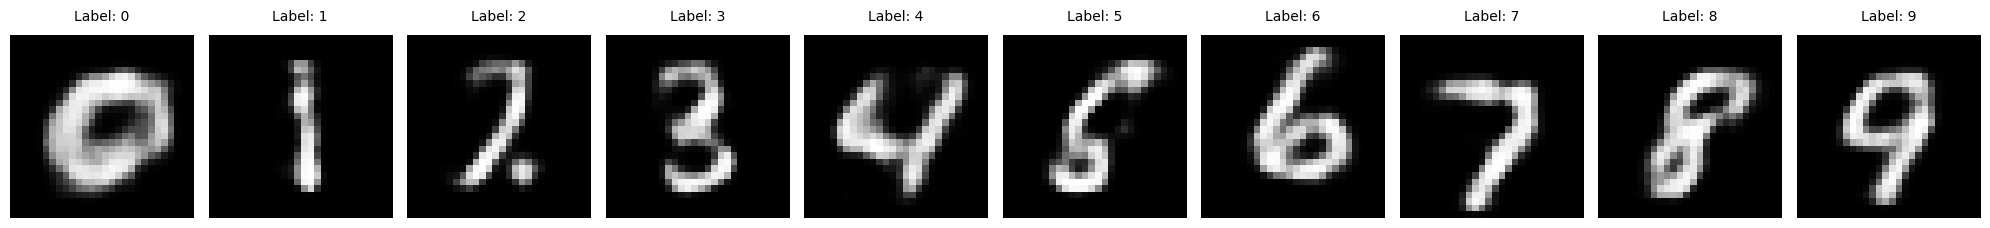

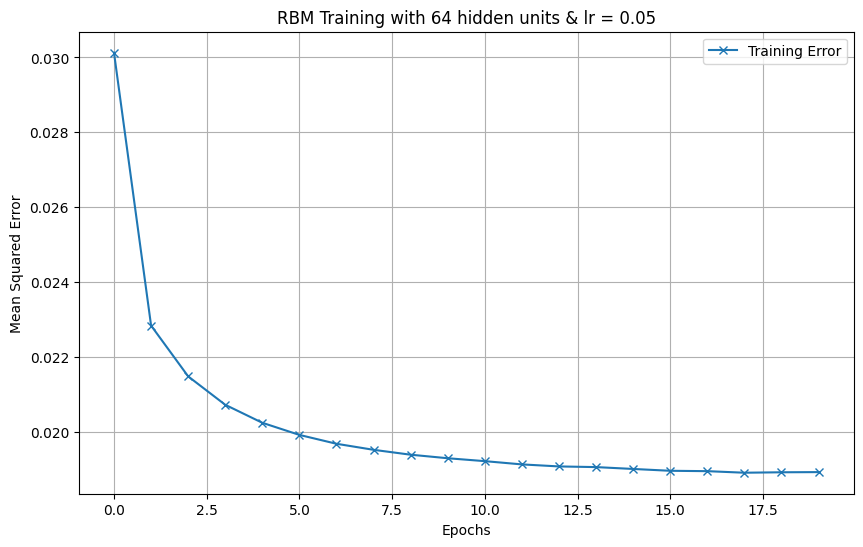

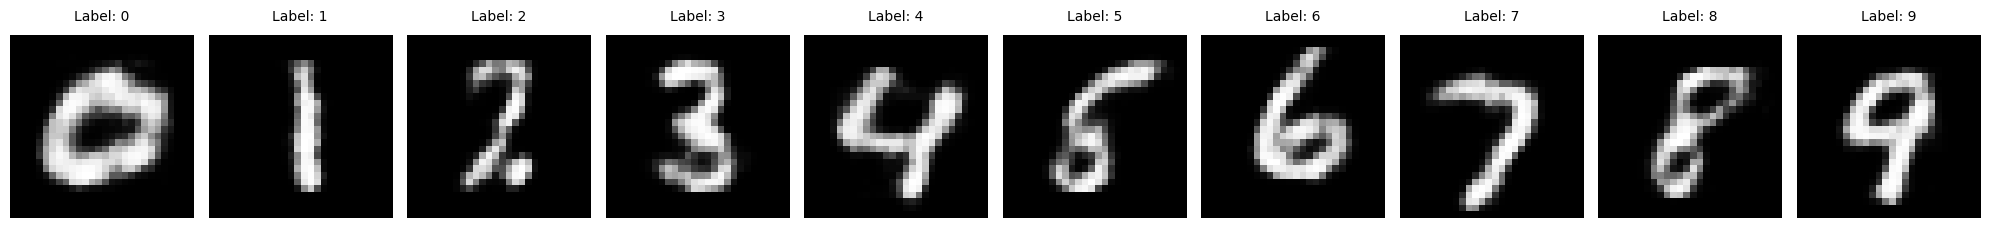

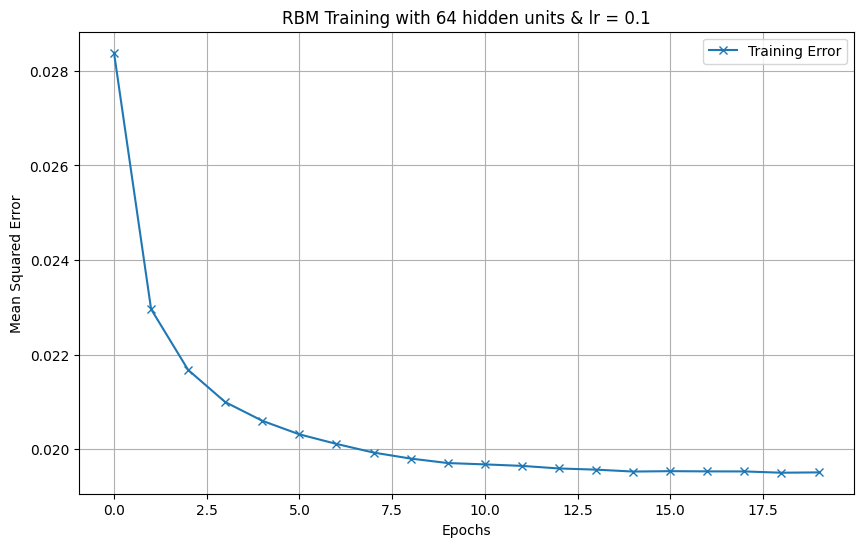

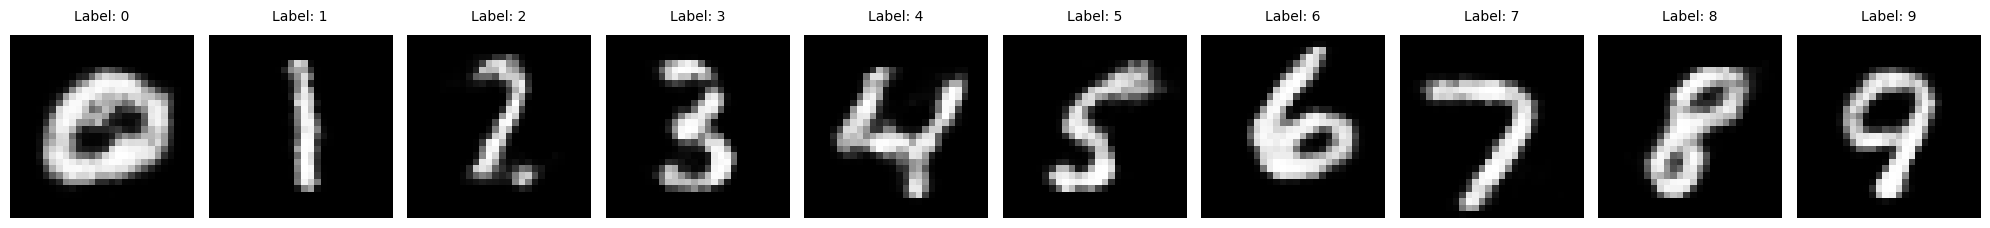

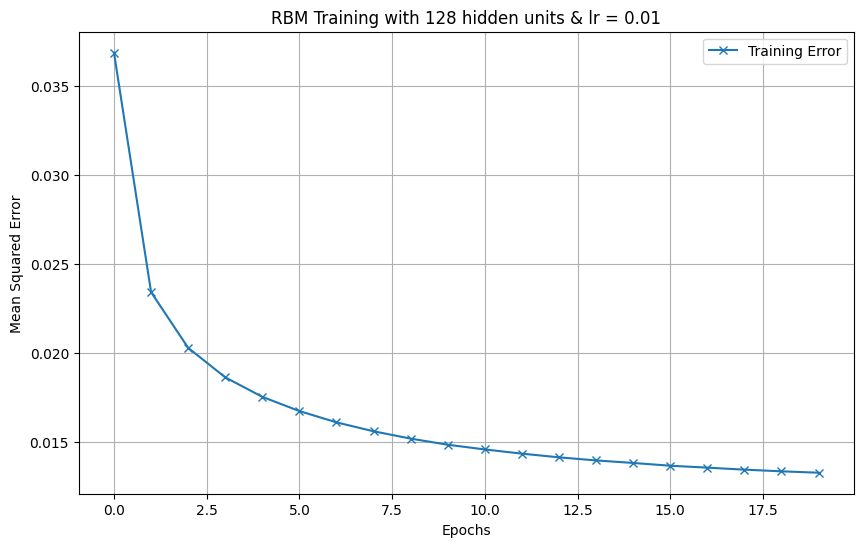

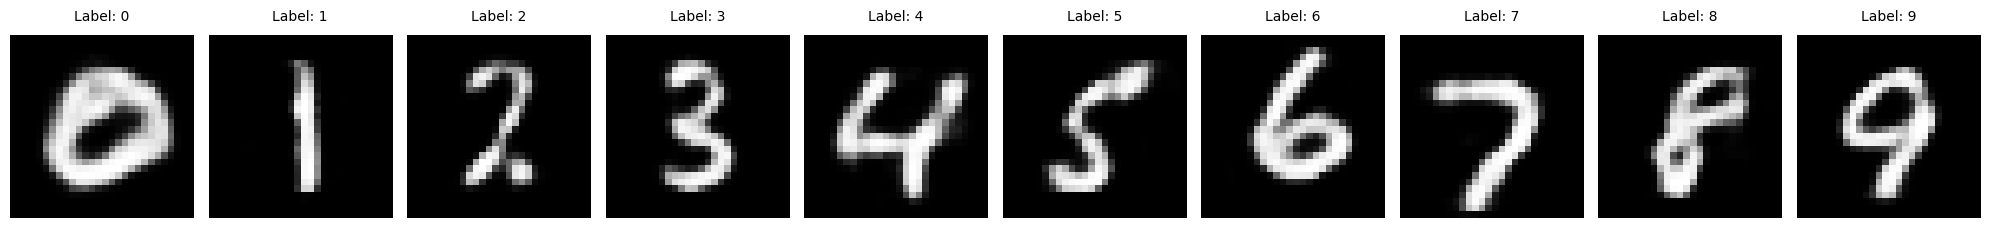

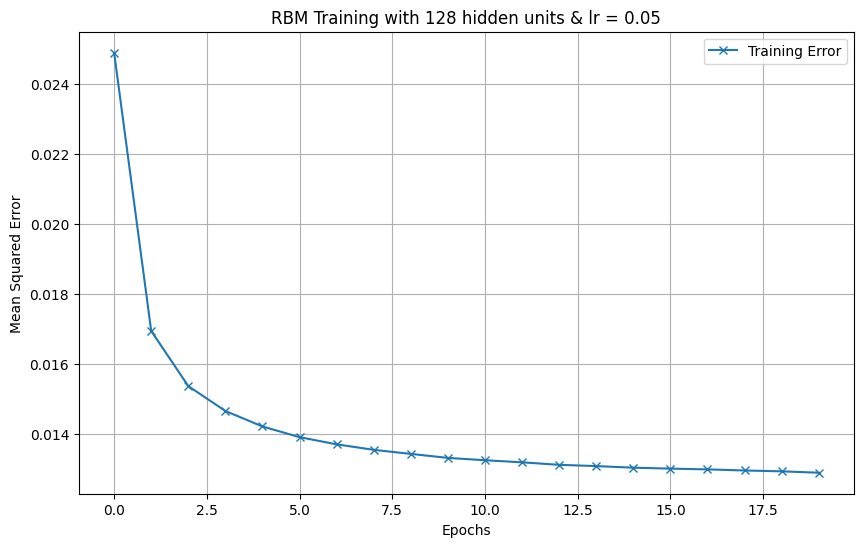

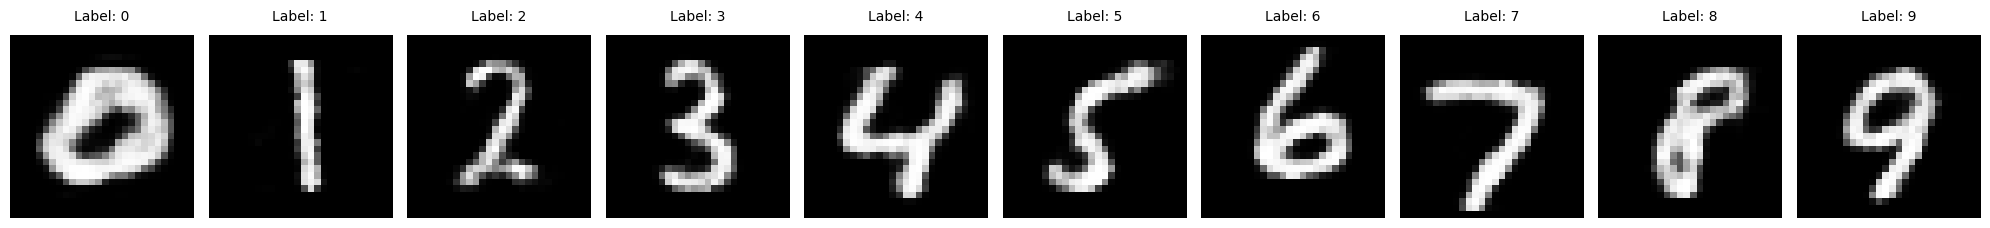

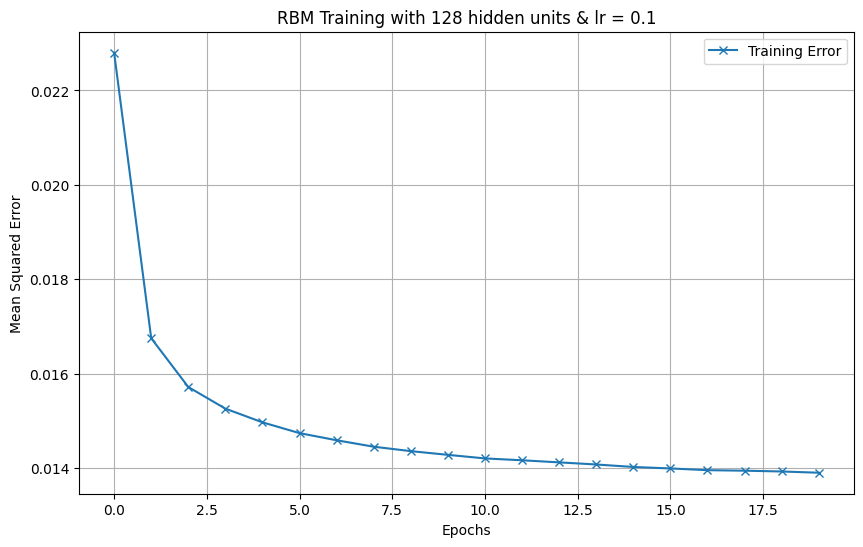

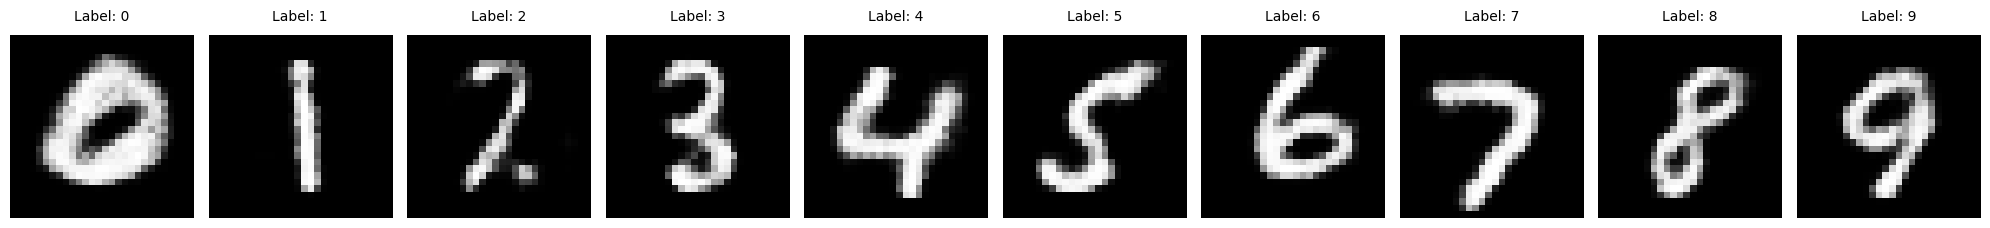

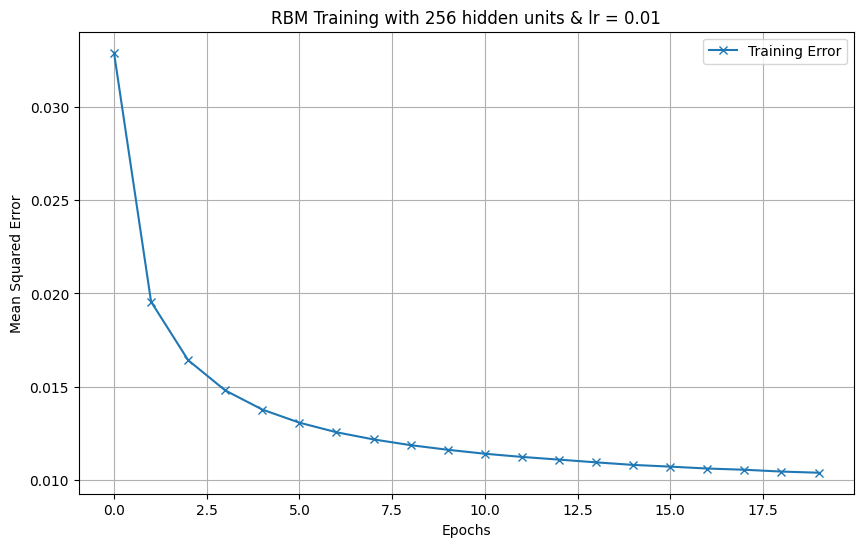

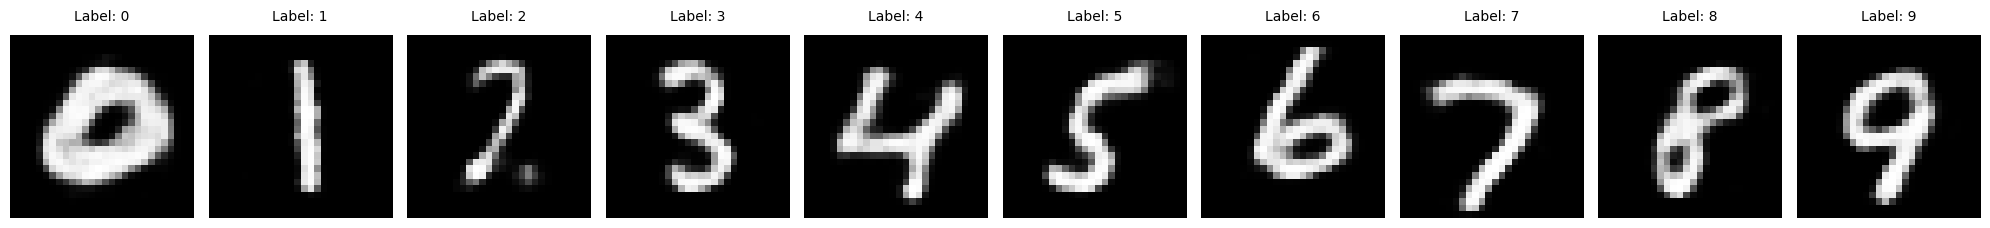

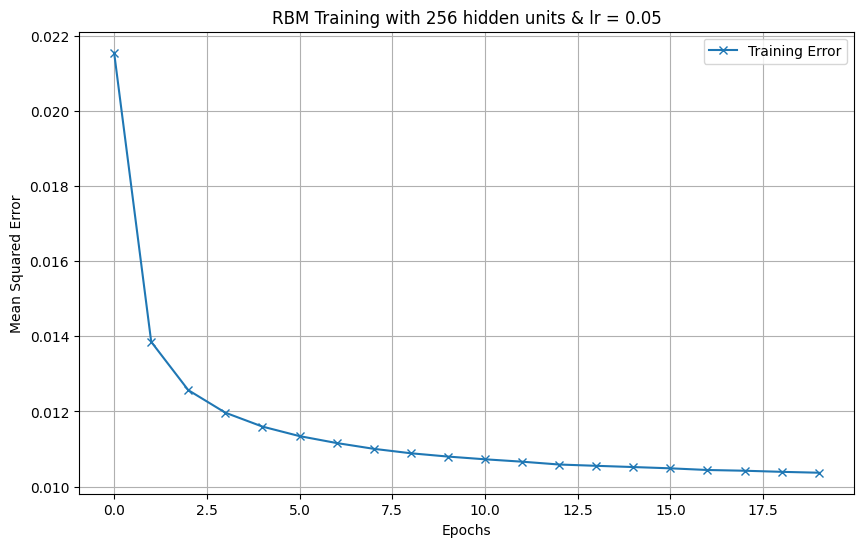

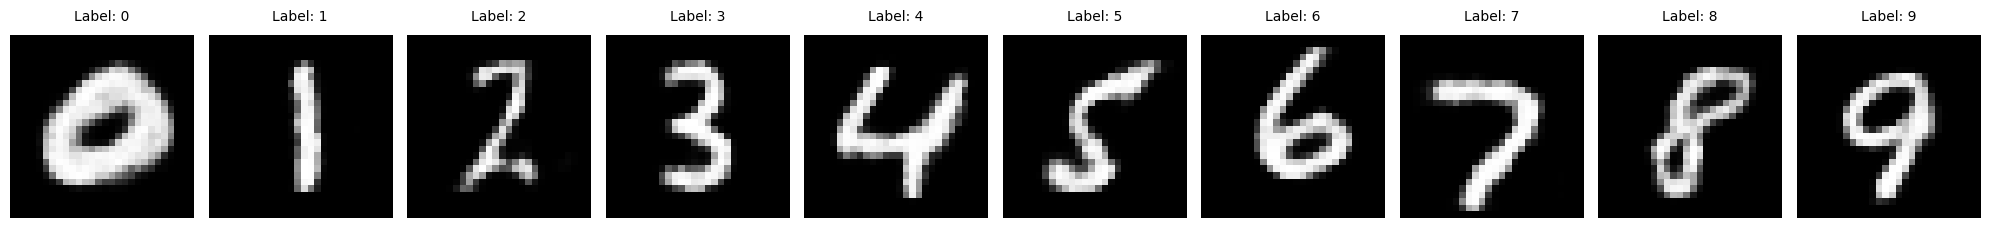

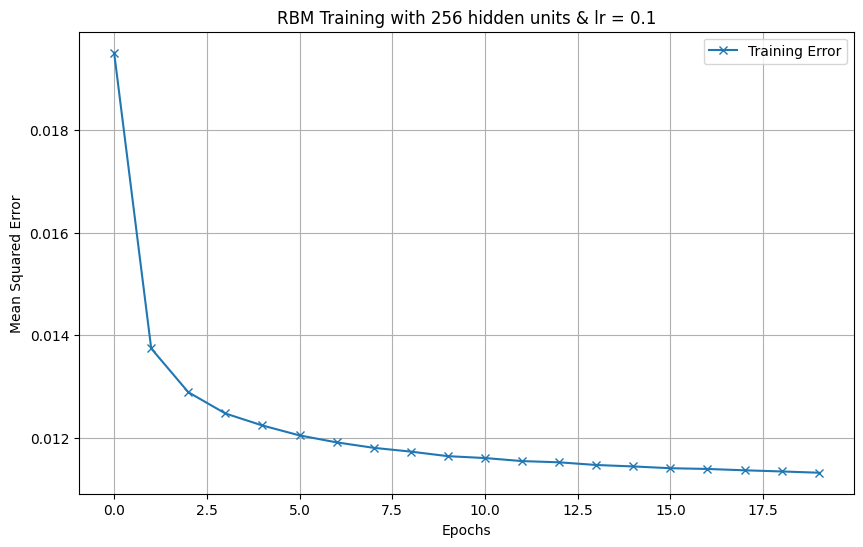

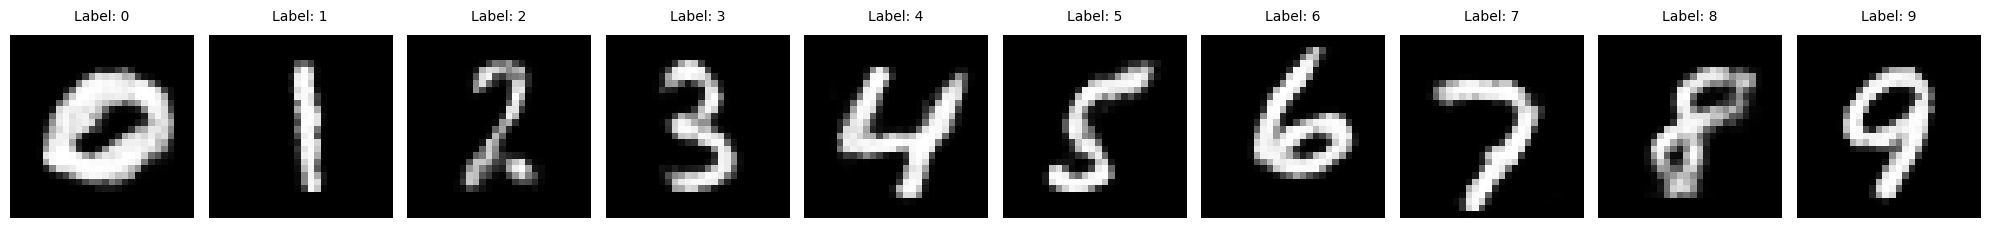

In [31]:
n_hidden = [64, 128, 256]
learning_rates = [0.01, 0.05, 0.1]
for nh in n_hidden:
    for lr in learning_rates:
        reconstructions = plot_errors_rbm(X_train, X_test_sample, n_hidden=nh, learning_rate=lr, batch_size=10, max_epochs=20, title=f"RBM Training with {nh} hidden units & lr = {lr}")
        plot_images(reconstructions, Y_test_sample)

<div style="text-align: left;">
  <h4><b>Ejercicio 6</b></h4>
</div>

**Entrene una red convolucional para clasificar las imágenes de la base de datos MNIST. ¿Cuál es la red convolucional más pequeña que puede conseguir con una exactitud de al menos $90\%$ en el conjunto de evaluación? ¿Cuál es el perceptrón multicapa más pequeño que puede conseguir con la misma exactitud?**

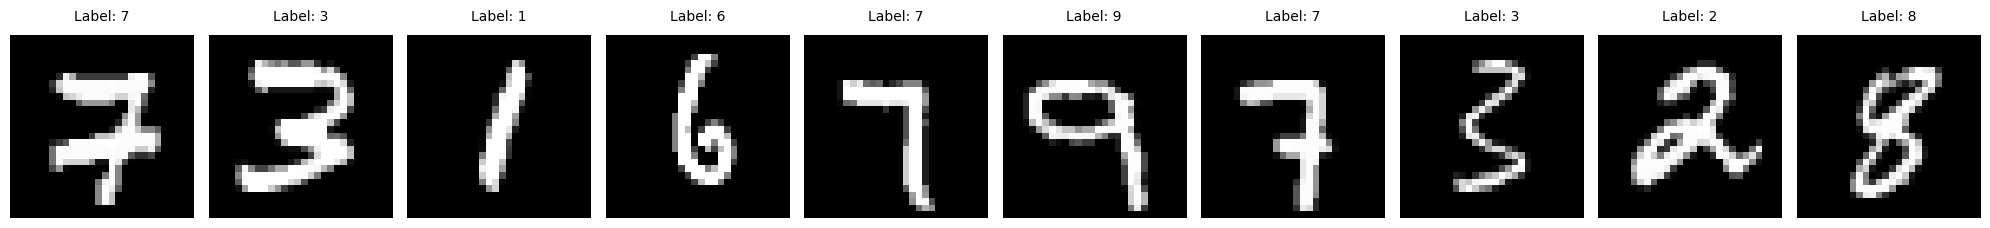

In [4]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from tqdm import tqdm

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Loaders to iterate over the datasets
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=256, shuffle=False)

# 10 random images from the training set to verify the data loading
indices = np.random.choice(len(train_dataset), size=10, replace=False)
plot_images(train_dataset.data[indices], train_dataset.targets[indices])

display(HTML(f"<b>Training shapes:</b> {train_dataset.data.shape}"))
display(HTML(f"<b>Test shapes:</b> {test_dataset.data.shape}"))

In [ ]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Accuracy: 86.47%
class TinyCNN882(nn.Module):
    # 882 params
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 8, 5, stride=2, padding=2)
        self.c2 = nn.Conv2d(8, 8, 3, padding=1)
        self.fc = nn.Linear(8, 10)
    def forward(self, x):
        x = F.relu(self.c1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.c2(x))
        x = x.mean(dim=(2,3))
        return self.fc(x)

# Accuracy: 90%
class CNN946(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 6, 5, stride=2, padding=2, bias=True)   # 156
        self.c2 = nn.Conv2d(6, 12, 3, padding=1, bias=True)            # 660
        self.fc = nn.Linear(12, 10, bias=True)                         # 130
    def forward(self, x):
        x = F.relu(self.c1(x))         # (B,6,14,14)
        x = F.max_pool2d(x, 2)         # (B,6,7,7)
        x = F.relu(self.c2(x))         # (B,12,7,7)
        x = x.mean(dim=(2,3))          # GAP -> (B,12)
        return self.fc(x)              # (B,10)
    


In [7]:
# 1) CNN982_BN
class CNN982_BN(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 6, 5, stride=2, padding=2, bias=True)   # 156
        self.bn1 = nn.BatchNorm2d(6)                                   # 12
        self.c2 = nn.Conv2d(6, 12, 3, padding=1, bias=True)            # 660
        self.bn2 = nn.BatchNorm2d(12)                                  # 24
        self.fc = nn.Linear(12, 10, bias=True)                         # 130
    def forward(self, x):
        x = F.relu(self.bn1(self.c1(x)))   # (B,6,14,14)
        x = F.max_pool2d(x, 2)             # (B,6,7,7)
        x = F.relu(self.bn2(self.c2(x)))   # (B,12,7,7)
        x = x.mean(dim=(2,3))              # GAP -> (B,12)
        return self.fc(x)                  # (B,10)

# 2) TriConv968
class TriConv968(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 7, 3, padding=1, bias=True)             # 70
        self.c2 = nn.Conv2d(7,12, 3, padding=1, bias=True)             # 768
        self.c3 = nn.Conv2d(12,10,1, bias=True)                        # 130
    def forward(self, x):
        x = F.relu(self.c1(x))         # (B,7,28,28)
        x = F.max_pool2d(x, 2)         # (B,7,14,14)
        x = F.relu(self.c2(x))         # (B,12,14,14)
        x = F.max_pool2d(x, 2)         # (B,12,7,7)
        x = self.c3(x)                 # (B,10,7,7)
        x = x.mean(dim=(2,3))          # GAP -> (B,10)
        return x

# 3) AllCNN956_BN
class AllCNN956_BN(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 8, 3, stride=2, padding=1, bias=True)   # 80
        self.bn1 = nn.BatchNorm2d(8)                                   # 16
        self.c2 = nn.Conv2d(8,10, 3, stride=2, padding=1, bias=True)   # 730
        self.bn2 = nn.BatchNorm2d(10)                                  # 20
        self.c3 = nn.Conv2d(10,10,1, bias=True)                        # 110
    def forward(self, x):
        x = F.relu(self.bn1(self.c1(x)))   # (B,8,14,14)
        x = F.relu(self.bn2(self.c2(x)))   # (B,10,7,7)
        x = self.c3(x)                     # (B,10,7,7)
        x = x.mean(dim=(2,3))              # GAP -> (B,10)
        return x

# 4) CNN924
class CNN924(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 5, 5, stride=2, padding=2, bias=True)   # 130
        self.c2 = nn.Conv2d(5,14, 3, padding=1, bias=True)             # 644
        self.fc = nn.Linear(14, 10, bias=True)                         # 150
    def forward(self, x):
        x = F.relu(self.c1(x))         # (B,5,14,14)
        x = F.max_pool2d(x, 2)         # (B,5,7,7)
        x = F.relu(self.c2(x))         # (B,14,7,7)
        x = x.mean(dim=(2,3))          # GAP -> (B,14)
        return self.fc(x)
    
class TriConv968(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 7, 3, padding=1, bias=True)   # 70 params
        self.c2 = nn.Conv2d(7,12, 3, padding=1, bias=True)   # 768 params
        self.c3 = nn.Conv2d(12,10,1, bias=True)              # 130 params

    def forward(self, x):
        x = F.relu(self.c1(x)) 
        x = F.max_pool2d(x, 2)
        x = F.relu(self.c2(x))
        x = F.max_pool2d(x, 2)
        x = self.c3(x)
        x = x.mean(dim=(2,3))    # GAP
        return x

In [8]:
# ==========================================================
# Funciones auxiliares
# ==========================================================

def count_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def train_model(model, train_loader, test_loader, epochs=15, lr=1e-3):
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            outputs = model(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        # validación al final de la época
        acc = test_model(model, test_loader)
        print(f"Epoch {epoch+1}/{epochs} | Loss: {running_loss/len(train_loader):.4f} | Test Acc: {acc:.2f}%")
    return model

def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)
    return 100 * correct / total

# ==========================================================
# Entrenamiento de las 4 CNNs pequeñas
# ==========================================================

# models = {
#     "AllCNNMini": AllCNNMini(),
#     "TinyCNN882": TinyCNN882(),
#     "LeNetLiteGAP": LeNetLiteGAP(),
#     "DSCNNTiny": DSCNNTiny()
# }

# models = {
#     "CNN946": CNN946(),
#     "AllCNN920": AllCNN920(),
#     "DSTurbo682": DSTurbo682(),
#     "TriConv850": TriConv850()
# }

models = {
    "CNN982_BN": CNN982_BN(),
    "TriConv968": TriConv968(),
    "AllCNN956_BN": AllCNN956_BN(),
    "CNN924": CNN924(),
    "TriConv968": TriConv968()
}
    

for name, model in models.items():
    print(f"\n🧠 Entrenando modelo: {name}")
    print(f"Parámetros entrenables: {count_params(model)}")
    trained_model = train_model(model, train_loader, test_loader, epochs=15, lr=1e-3)
    acc = test_model(trained_model, test_loader)
    print(f"✅ {name}: {acc:.2f}% de accuracy en test\n")


🧠 Entrenando modelo: CNN982_BN
Parámetros entrenables: 982
Epoch 1/15 | Loss: 1.8352 | Test Acc: 59.10%
Epoch 2/15 | Loss: 1.2275 | Test Acc: 71.01%
Epoch 3/15 | Loss: 0.9268 | Test Acc: 78.52%
Epoch 4/15 | Loss: 0.7495 | Test Acc: 81.92%
Epoch 5/15 | Loss: 0.6301 | Test Acc: 84.84%
Epoch 6/15 | Loss: 0.5465 | Test Acc: 87.15%
Epoch 7/15 | Loss: 0.4855 | Test Acc: 87.95%
Epoch 8/15 | Loss: 0.4420 | Test Acc: 87.26%
Epoch 9/15 | Loss: 0.4084 | Test Acc: 89.65%
Epoch 10/15 | Loss: 0.3815 | Test Acc: 87.28%
Epoch 11/15 | Loss: 0.3578 | Test Acc: 88.94%
Epoch 12/15 | Loss: 0.3399 | Test Acc: 90.82%
Epoch 13/15 | Loss: 0.3252 | Test Acc: 91.58%
Epoch 14/15 | Loss: 0.3101 | Test Acc: 91.84%
Epoch 15/15 | Loss: 0.2984 | Test Acc: 92.39%
✅ CNN982_BN: 92.39% de accuracy en test


🧠 Entrenando modelo: TriConv968
Parámetros entrenables: 968
Epoch 1/15 | Loss: 2.1870 | Test Acc: 29.18%
Epoch 2/15 | Loss: 1.7780 | Test Acc: 45.11%
Epoch 3/15 | Loss: 1.4951 | Test Acc: 56.24%
Epoch 4/15 | Loss: 1.2

---
---

<div style="text-align: left;">
  <h3><b>Conclusiones</b></h3>
</div>